In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import seaborn as sns


# from sklearn import metrics
from sklearn.feature_selection import mutual_info_regression
# from sklearn.feature_selection import mutual_info_regression
# from sklearn.preprocessing import MinMaxScaler, StandardScaler
# from sklearn.model_selection import train_test_split, GridSearchCV


# # Build the Regression / Regressor models
# # from xgboost import XGBRegressor
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, GradientBoostingClassifier


# import os
# import datetime
# from datetime import datetime as datet
# from decimal import Decimal
import warnings
# from pickle import dump, load

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
mp.style.use('fivethirtyeight')
pd.options.display.float_format = '{:.5}'.format

In [2]:
data = pd.read_csv("data.csv")
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.0068

In [5]:
for col in data.columns:
    if "Invoice"in col or "invoice" in col:
        print(col)
print("Done")

Done


In [6]:
data.shape

(6819, 96)

In [7]:
data["Bankrupt?"].value_counts()

Bankrupt?
0    6599
1     220
Name: count, dtype: int64

TODO:-
* Make a plan and what all things to do. Analyse the data and write al group bys, crosstabs, visualizations algos to use etc. Just go raw on the dataset
    * Make sure to add multitudes of things as this is not a competition submission but knowledge display.
    * Data Quality and Description all in one Function - **Day 1**
        * Shape
        * Missing Rows
        * Unique Values (Only cat ftrs, if numeric and <= 20 unique vals) and their counts
        * Creating a list of cat ftrs and numeric ftrs with vals <= 20 and other numeric ftrs.
        * Duplicate Records
        * If numeric col print skew and kurtosis
    * Pre Feature Selection - Correlation, Mutual Information. **Day 1**
    * Feature Selection - Predictive Power Score, Decision Trees and Lasso Regression, Select k best. **Day 1**
    * Hypothesis Testing - 2 sample T-test on the remaining columns. **Day 2**
    * Group bys - On the remaining columns. **Day 3**
    * Visualizations - Box Plots, KDE Plots (to understand distributions), the line thingy. **Day 3**
    * Crosstabs and that color thing **Day 3**
    * Outlier Detection with - Box plots, LOF, Gaussian Distribution Thingy, ECOD. **Day 4**
    * UMAP and PCA comparison - How to integrate in the notebook. **Day 4, 5**
    * BorderLine SMOTE **Day 5**
    * Model Training- multiple models  **Day 6**
    * Accuracy Metrics **Day 6**
    * Probability Threshold Analysis  **Day 7**
    * LIME - Model Interpretability.  **Day 7**
    * Conclusion and other important points and submission-running **Day 8**
* Make a time sheet (JIRA Kinda thing) - Deadline - 7th Sept
* Execute
* We get Gold for this one.

* Group by 
    * analyze ranges and outliers
    * avg and median values
    * 
* UMAP and TSNE
* SMOTE

In [13]:
data["Bankrupt?"].dtypes == 'int64'

True

In [17]:
def data_quality(data, target_var, unique_val_threshold = 20, num_to_cat_threshold = 20):
    cat_cols = []
    num_cols = []
    cat_cols_num_val = []
    date_time_cols = []
    data_info = pd.DataFrame(columns=['Column Name', 'Num Unique Values', 'DType', "Null Values", "Skew", "Kurtosis"])
    ctr = 1

    print("Shape:- ", data.shape[0], " rows & ", data.shape[1], " cols")
    print("\n--------------------------------------------------------\n")
    # print(data.isna().sum())
    # print("\n--------------------------------------------------------\n")
    
    for col in data.columns:
        # print(col, " - ", data[col].nunique(), " - ", data[col].dtypes, "\n")
        data_info.loc[ctr] = [col, data[col].nunique(), data[col].dtypes, data[col].isna().sum(), data[col].skew(), data[col].kurtosis()]
        ctr += 1

        if data[col].nunique() <= unique_val_threshold:
            print(col)
            print(data[col].unique())
            print("----------------------------------------------------------------------------")
            print()
        
        if data[col].dtypes == object:
            cat_cols.append(col)
        elif data[col].dtypes == "int64" or data[col].dtypes == "float64":
            if data[col].nunique() <= num_to_cat_threshold:
                cat_cols_num_val.append(col)
            else:
                num_cols.append(col)
        elif data[col].dtypes == "datetime64":
            date_time_cols.append(col)

    dups = data.drop([target_var], axis = 1).duplicated().sum()
    print("Total number of Duplicates:- ", dups)
    print("\n--------------------------------------------------------\n")
    
    print("Categorical Columns:-\n", cat_cols, "\n")
    print("Numerical Columns:- \n", num_cols, "\n")
    print("Categorical Coumns Having Numerical Values:- \n", cat_cols_num_val, "\n")
    print("Date Time Columns:-\n", date_time_cols, "\n")
    print("\n--------------------------------------------------------\n")
    # data_info = pd.concat([data_info, data.isna().sum()])
    return data_info, cat_cols, num_cols, cat_cols_num_val, date_time_cols

In [18]:
data_info, cat_cols, num_cols, cat_col_num_val, date_time_cols = data_quality(data, "Bankrupt?")

Shape:-  6819  rows &  96  cols

--------------------------------------------------------

Bankrupt?
[1 0]
----------------------------------------------------------------------------

 Liability-Assets Flag
[0 1]
----------------------------------------------------------------------------

 Net Income Flag
[1]
----------------------------------------------------------------------------

Total number of Duplicates:-  0

--------------------------------------------------------

Categorical Columns:-
 [] 

Numerical Columns:- 
 [' ROA(C) before interest and depreciation before interest', ' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax', ' Operating Gross Margin', ' Realized Sales Gross Margin', ' Operating Profit Rate', ' Pre-tax net Interest Rate', ' After-tax net Interest Rate', ' Non-industry income and expenditure/revenue', ' Continuous interest rate (after tax)', ' Operating Expense Rate', ' Research and development expense rate', ' Cas

In [19]:
data_info

,Column Name,Num Unique Values,DType,Null Values,Skew,Kurtosis
1,Bankrupt?,2,int64,0,5.295388,26.048769
2,ROA(C) before interest and depreciation befor...,3333,float64,0,-0.323941,6.390770
3,ROA(A) before interest and % after tax,3151,float64,0,-1.033727,9.038785
4,ROA(B) before interest and depreciation after...,3160,float64,0,-0.763564,7.929074
5,Operating Gross Margin,3781,float64,0,-8.043368,365.540671
6,Realized Sales Gross Margin,3788,float64,0,-8.066572,367.041830
7,Operating Profit Rate,3376,float64,0,-70.237164,5210.086057
8,Pre-tax net Interest Rate,3789,float64,0,-52.482867,3053.033349
9,After-tax net Interest Rate,3604,float64,0,-52.995744,3029.115791
10,Non-industry income and expenditure/revenue,2551,float64,0,39.641689,2649.428722


In [23]:
data_info.loc[8]["Column Name"]

' Pre-tax net Interest Rate'

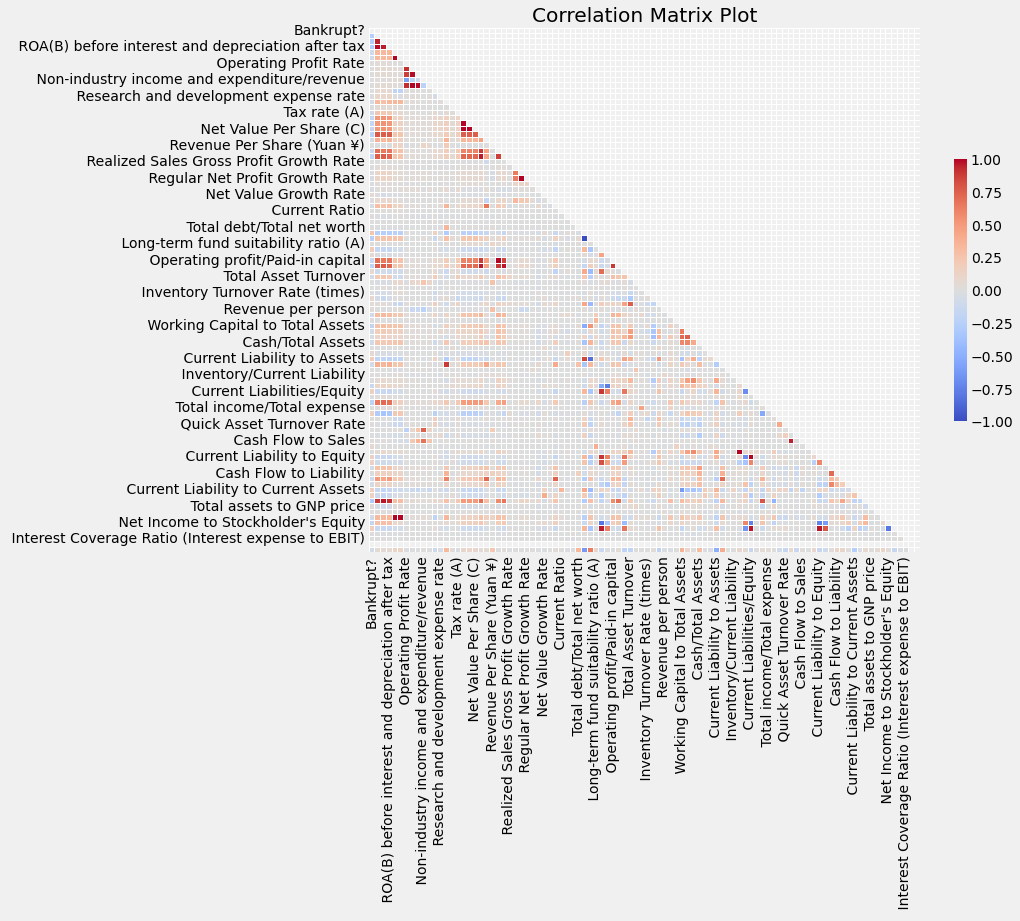

In [37]:
data_corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(data_corr, dtype=bool))
fig, ax = mp.subplots(figsize=(11, 9))
palette = sns.color_palette("coolwarm", as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(data_corr, mask=mask, cmap=palette, center=0, linewidths=0.7, cbar_kws={"shrink": .5})

mp.title("Correlation Matrix Plot")
mp.show()

[Mutual Information v/s Information Gain](https://www.geeksforgeeks.org/information-gain-and-mutual-information-for-machine-learning/)

[MI - Feature Selection](https://bobrupakroy.medium.com/mutual-information-score-feature-selection-8eb19071664b#:~:text=Mutual%20information%20is%20straightforward%20when,condition%20of%20the%20target%20value.&text=The%20MI%20score%20will%20fall,the%20feature%20and%20the%20target.)

[MI between continous and discreet variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3929353/)

In [16]:
from sklearn.model_selection import train_test_split
X, Y = data.drop(["Bankrupt?"], axis = 1), data["Bankrupt?"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [17]:
def mi(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [15]:
mi_cols = mi(data.drop(["Bankrupt?"], axis = 1), data["Bankrupt?"])

mi_selected_cols = mi_cols.loc[mi_cols >= 0.03].index.tolist()
mi_selected_cols

[' Persistent EPS in the Last Four Seasons',
 ' Net profit before tax/Paid-in capital',
 " Net Income to Stockholder's Equity",
 ' Net Income to Total Assets',
 ' ROA(A) before interest and % after tax',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' Continuous interest rate (after tax)',
 ' Net worth/Assets',
 ' Equity to Liability',
 ' Borrowing dependency',
 ' Debt ratio %',
 ' Degree of Financial Leverage (DFL)',
 ' Retained Earnings to Total Assets',
 ' Interest Expense Ratio',
 ' ROA(B) before interest and depreciation after tax',
 ' Net Value Per Share (B)',
 ' Liability to Equity',
 ' ROA(C) before interest and depreciation before interest',
 ' Total income/Total expense',
 ' Interest Coverage Ratio (Interest expense to EBIT)']

In [18]:
mi_cols = mi(X_train, Y_train)

mi_selected_cols = mi_cols.loc[mi_cols >= 0.03].index.tolist()
mi_selected_cols

[" Net Income to Stockholder's Equity",
 ' Per Share Net profit before tax (Yuan ¥)',
 ' Persistent EPS in the Last Four Seasons',
 ' ROA(A) before interest and % after tax',
 ' Borrowing dependency',
 ' Net Income to Total Assets',
 ' Net Value Per Share (C)',
 ' Net profit before tax/Paid-in capital',
 ' Interest Expense Ratio',
 ' ROA(C) before interest and depreciation before interest',
 ' Equity to Liability',
 ' Debt ratio %',
 ' Net worth/Assets',
 ' Net Value Per Share (B)']

In [35]:
mi_cols

 Net Income to Stockholder's Equity                          0.037908
 Per Share Net profit before tax (Yuan ¥)                    0.035074
 Persistent EPS in the Last Four Seasons                     0.034669
 ROA(A) before interest and % after tax                      0.034309
 Borrowing dependency                                        0.033912
 Net Income to Total Assets                                  0.033452
 Net Value Per Share (C)                                     0.032915
 Net profit before tax/Paid-in capital                       0.032727
 Interest Expense Ratio                                      0.032154
 ROA(C) before interest and depreciation before interest     0.031971
 Equity to Liability                                         0.031093
 Debt ratio %                                                0.030774
 Net worth/Assets                                            0.030239
 Net Value Per Share (B)                                     0.030074
 Interest Coverage R

In [23]:
mi_selected_cols_without_split = set([' Persistent EPS in the Last Four Seasons',
 ' Net profit before tax/Paid-in capital',
 " Net Income to Stockholder's Equity",
 ' Net Income to Total Assets',
 ' ROA(A) before interest and % after tax',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' Continuous interest rate (after tax)',
 ' Net worth/Assets',
 ' Equity to Liability',
 ' Borrowing dependency',
 ' Debt ratio %',
 ' Degree of Financial Leverage (DFL)',
 ' Retained Earnings to Total Assets',
 ' Interest Expense Ratio',
 ' ROA(B) before interest and depreciation after tax',
 ' Net Value Per Share (B)',
 ' Liability to Equity',
 ' ROA(C) before interest and depreciation before interest',
 ' Total income/Total expense',
 ' Interest Coverage Ratio (Interest expense to EBIT)'])


mi_selected_cols = set(mi_selected_cols)

print(mi_selected_cols.issubset(mi_selected_cols_without_split))
print()

print(mi_selected_cols - mi_selected_cols_without_split)
print()

print(mi_selected_cols_without_split - mi_selected_cols)
print()

False

{' Net Value Per Share (C)'}

{' Interest Coverage Ratio (Interest expense to EBIT)', ' ROA(B) before interest and depreciation after tax', ' Liability to Equity', ' Retained Earnings to Total Assets', ' Degree of Financial Leverage (DFL)', ' Total income/Total expense', ' Continuous interest rate (after tax)'}



In [19]:
len(mi_selected_cols)

14

In [ ]:
# Calculating Predictive power score (PPS)
pps_input_df = X_train.copy()
pps_input_df['Bankrupt'] = y_train.astype(str).copy()
pps_df = pps.predictors(pps_input_df, y="Bankrupt")
pps_df = pps_df[pps_df.ppscore > 0]

# Plotting PPS
plt.figure(figsize=(16,6))
sns.barplot(data=pps_df, x="ppscore", y="x")
plt.ylabel("Features")
plt.xlabel("PPScore > 0")
plt.tight_layout()
plt.title("PPScore")
plt.show()

In [18]:
print(pd.__version__)

2.2.2


In [3]:
from feature_engine.selection import DropConstantFeatures, DropCorrelatedFeatures, DropDuplicateFeatures
from sklearn.pipeline import Pipeline

In [37]:
# X, y = data.drop(["Bankrupt?"], axis=1), data["Bankrupt?"]
# X.drop(X.columns[X.nunique() == 1][0], axis = 1, inplace = True)

pipeline = Pipeline(steps=[
    ('Constant', DropConstantFeatures()),
    ('Correlated', DropCorrelatedFeatures())
])

X_train_after_pipeline = pipeline.fit_transform(X_train)
print(X_train_after_pipeline.shape)

# print(X_train_after_pipeline.columns)

(4568, 67)


In [25]:
ftr_engine_cols = list(X_train_after_pipeline.columns)

In [26]:
mi_selected_cols = [' Persistent EPS in the Last Four Seasons',
 ' Net profit before tax/Paid-in capital',
 " Net Income to Stockholder's Equity",
 ' Net Income to Total Assets',
 ' ROA(A) before interest and % after tax',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' Continuous interest rate (after tax)',
 ' Net worth/Assets',
 ' Equity to Liability',
 ' Borrowing dependency',
 ' Debt ratio %',
 ' Degree of Financial Leverage (DFL)',
 ' Retained Earnings to Total Assets',
 ' Interest Expense Ratio',
 ' ROA(B) before interest and depreciation after tax',
 ' Net Value Per Share (B)',
 ' Liability to Equity',
 ' ROA(C) before interest and depreciation before interest',
 ' Total income/Total expense',
 ' Interest Coverage Ratio (Interest expense to EBIT)']

pps_selected_cols = [' Net Value Growth Rate',
 ' Liability-Assets Flag',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' After-tax net Interest Rate',
 ' Net Income Flag']


# ftr_engine_cols

selected_ftrs = list(set(ftr_engine_cols + mi_selected_cols + pps_selected_cols))

selected_ftrs

[' Interest Coverage Ratio (Interest expense to EBIT)',
 ' Revenue per person',
 ' Cash Flow Per Share',
 ' ROA(C) before interest and depreciation before interest',
 ' Total Asset Turnover',
 ' Working Capital to Total Assets',
 ' Inventory/Working Capital',
 ' Persistent EPS in the Last Four Seasons',
 ' Inventory/Current Liability',
 ' Current Ratio',
 ' Quick Ratio',
 ' Average Collection Days',
 ' Current Liability to Assets',
 ' Quick Assets/Total Assets',
 ' Quick Asset Turnover Rate',
 ' Current Liability to Current Assets',
 ' Total assets to GNP price',
 ' Liability to Equity',
 ' No-credit Interval',
 ' Degree of Financial Leverage (DFL)',
 ' Net Income Flag',
 ' Inventory and accounts receivable/Net value',
 ' Working Capital/Equity',
 ' Liability-Assets Flag',
 ' ROA(B) before interest and depreciation after tax',
 ' Fixed Assets to Assets',
 ' After-tax Net Profit Growth Rate',
 ' Cash Flow to Total Assets',
 ' Research and development expense rate',
 " Net Income to Stoc

In [27]:
print(type(ftr_engine_cols))
print(type(mi_selected_cols))
print(type(pps_selected_cols))

<class 'list'>
<class 'list'>
<class 'list'>


In [28]:
len(selected_ftrs)

79

In [14]:
from sklearn.feature_selection import SelectKBest

In [38]:
X_train.to_csv("X_train.csv")
Y_train.to_csv("Y_train.csv")
X_test.to_csv("X_test.csv")
Y_test.to_csv("Y_test.csv")